**<center><h1>Evaluating LLaMA-3.2-11B-Vision with Ollama: Performance and Limitations Across Diverse Visual Scenarios</h1></center>**

In this notebook, we will test the capabilities of the **LLaMA-3.2-11B-Vision** model with Ollama by evaluating its performance across various image inputs and scenarios. Our goal is to assess how well the model interprets and responds to different visual cases, identifying both its strengths and limitations. By examining these tests, we aim to gain insight into the practical applications of LLaMA 3.2 Vision with Ollama, as well as potential areas for improvement.

## **1. Display available Models in Local**

In [1]:
! ollama list

NAME                       ID              SIZE      MODIFIED     
llama3.2-vision:latest     38107a0cd119    7.9 GB    3 hours ago     
phi3:3.8b                  d184c916657e    2.2 GB    4 months ago    
qwen2:1.5b                 f6daf2b25194    934 MB    4 months ago    
mistral:latest             2ae6f6dd7a3d    4.1 GB    4 months ago    
nomic-embed-text:latest    0a109f422b47    274 MB    4 months ago    
gemma:2b                   b50d6c999e59    1.7 GB    4 months ago    
llama3:latest              365c0bd3c000    4.7 GB    4 months ago    
phi_q4:latest              24a9598927e9    2.3 GB    5 months ago    
phi_fp16:latest            9b649d47a8fd    7.6 GB    5 months ago    


## **2. Show Available GPU Device**

In [2]:
! nvidia-smi

Sat Nov  9 14:09:35 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              1W /  135W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **3. Talk to Llama3.2-Vision-11B**

In [3]:
import ollama
import time
from IPython.display import Image, Markdown, display


def Talk_with_llama_3_2_vision(user_query, input_image):
    start_time = time.time()  # Start timer
    response = ollama.chat(
    model='llama3.2-vision:latest ',
    messages=[{
        'role': 'user',
        'content': user_query,
        'images': [input_image]
        }]
    )
    end_time = time.time()  # End timer
    # Calculate elapsed time
    execution_time = end_time - start_time
    #print(f"Response: {response['message']['content']}")
    # display the generated output as markdown
    display(Markdown(response['message']['content']))
    print(f"Execution time: {execution_time:.2f} seconds")

### **Charts Understanding**

First, let's start with a simple chart that i cropped from a financial report.

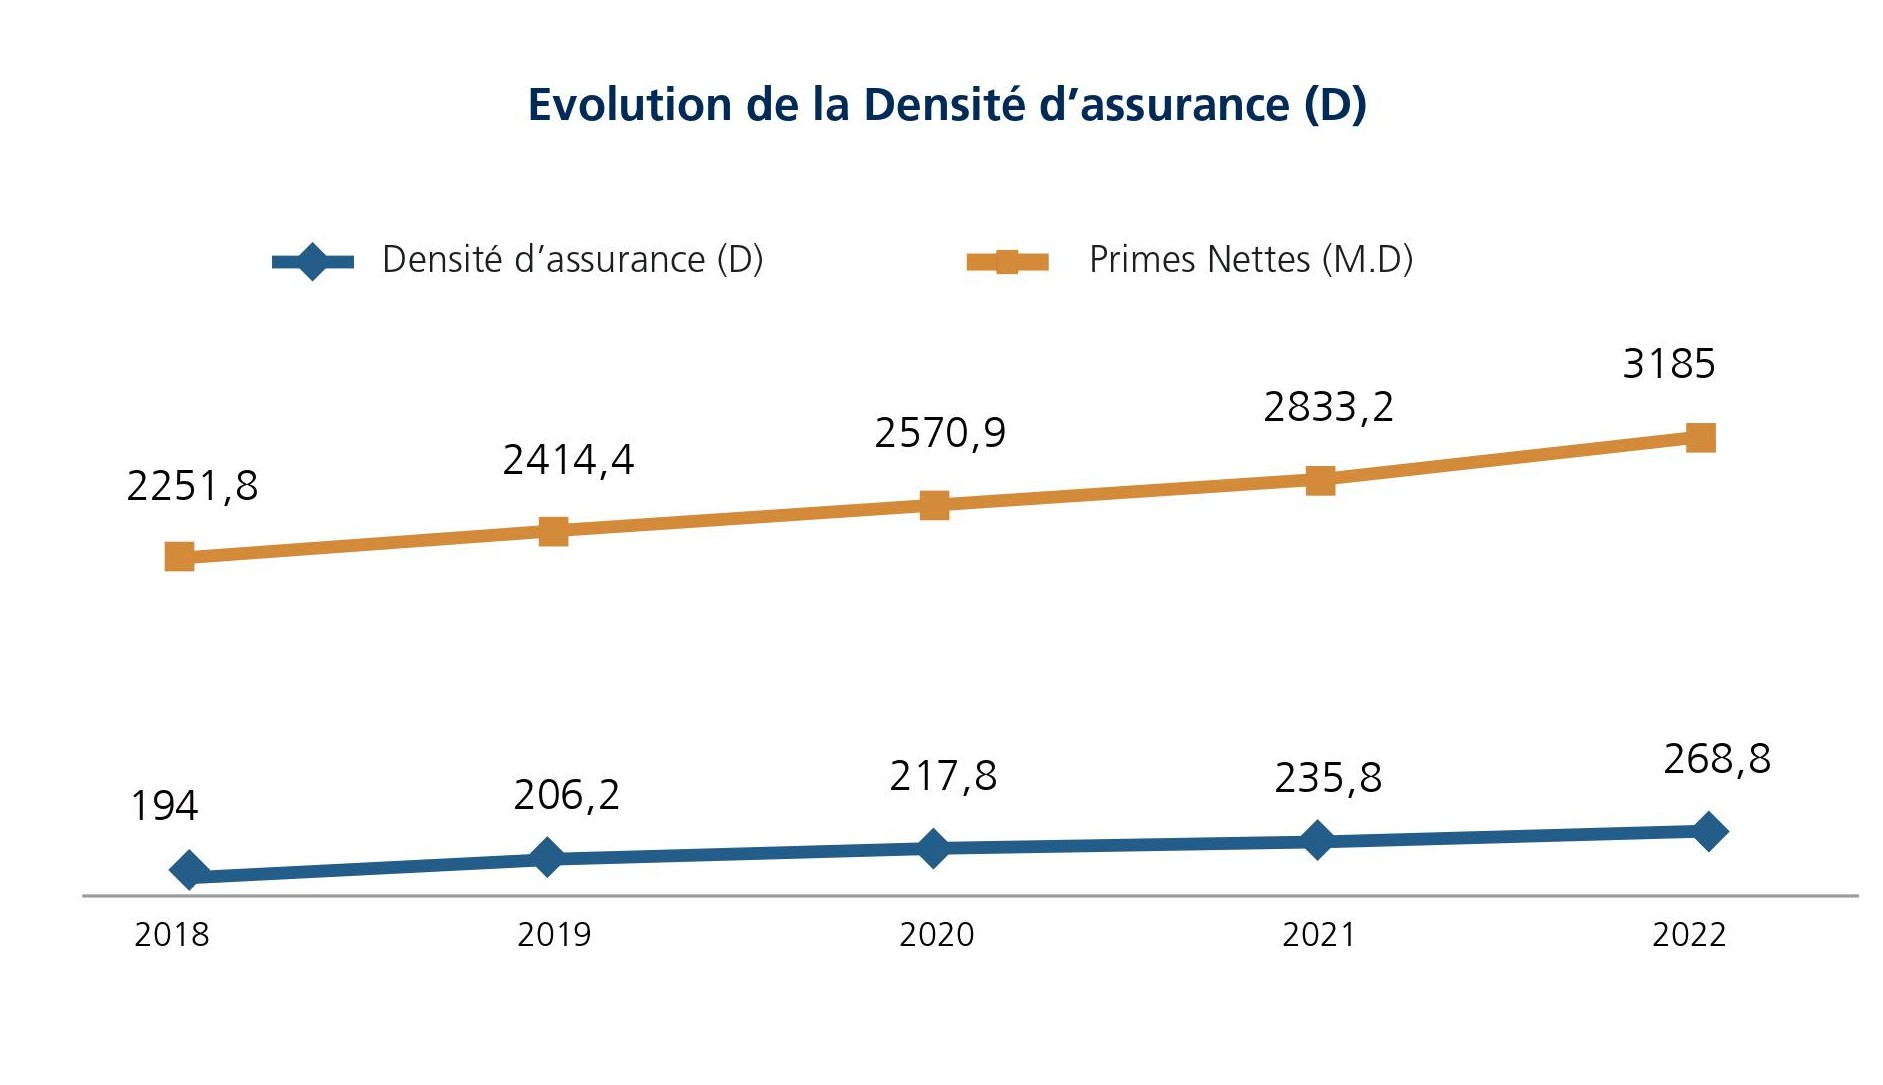

In [4]:
display(Image(filename="images_for_testing/charts/line_plot_cga.jpg"))

In [5]:
Talk_with_llama_3_2_vision('Describe the content of the given image',
                           'images_for_testing/charts/line_plot_cga.jpg')

The image presents a line graph titled "Evolution de la Densité d'Assurance (D)" in French, which translates to "Evolution of Insurance Density." The graph displays two lines: one for "Densité d'Assurance" and another for "Primes Nettes (M.D.)."

**Key Features:**

*   The x-axis represents the years from 2018 to 2022.
*   The y-axis is not explicitly labeled but appears to represent the values of the two lines.
*   The graph features a white background with blue and orange lines.

**Data Points:**

*   **Densité d'Assurance (D):**
    *   2018: approximately 194
    *   2019: around 206.2
    *   2020: about 217.8
    *   2021: roughly 235.8
    *   2022: slightly above 268.8
*   **Primes Nettes (M.D):**
    *   2018: approximately 2251.8
    *   2019: around 2414.4
    *   2020: about 2570.9
    *   2021: roughly 2833.2
    *   2022: slightly above 3185

**Observations:**

*   Both lines exhibit an upward trend over the five-year period.
*   The "Primes Nettes (M.D)" line consistently has higher values than the "Densité d'Assurance" line throughout the observed years.

In summary, the graph illustrates a steady increase in both insurance density and net premiums from 2018 to 2022, with net premiums maintaining a higher value compared to insurance density.

Execution time: 129.64 seconds


In [6]:
Talk_with_llama_3_2_vision('Extract the content of the image into a table in markdown format',
                           'images_for_testing/charts/line_plot_cga.jpg')

| Year | Densité d'assurance (D) | Primes Nettes (M.D.) |
| :--- | :---------------------: | :------------------: |
| 2018 |          194            |         2251,8       |
| 2019 |          206,2          |         2414,4       |
| 2020 |          217,8          |         2570,9       |
| 2021 |          235,8          |         2833,2       |
| 2022 |          268,8          |         3185         |

To extract the content of the image into a table in markdown format:

**Densité d'assurance (D) and Primes Nettes (M.D.)**

| Year | Densité d'assurance (D) | Primes Nettes (M.D.) |
| :--- | :---------------------: | :------------------: |
| 2018 |          194            |         2251,8       |
| 2019 |          206,2          |         2414,4       |
| 2020 |          217,8          |         2570,9       |
| 2021 |          235,8          |         2833,2       |
| 2022 |          268,8          |         3185         |

The table displays the values for Densité d'assurance (D) and Primes Nettes (M.D.) for each year from 2018 to 2022. The data is presented in a clear and organized manner, making it easy to read and understand.

Execution time: 109.38 seconds


Now let's try using more complex charts.

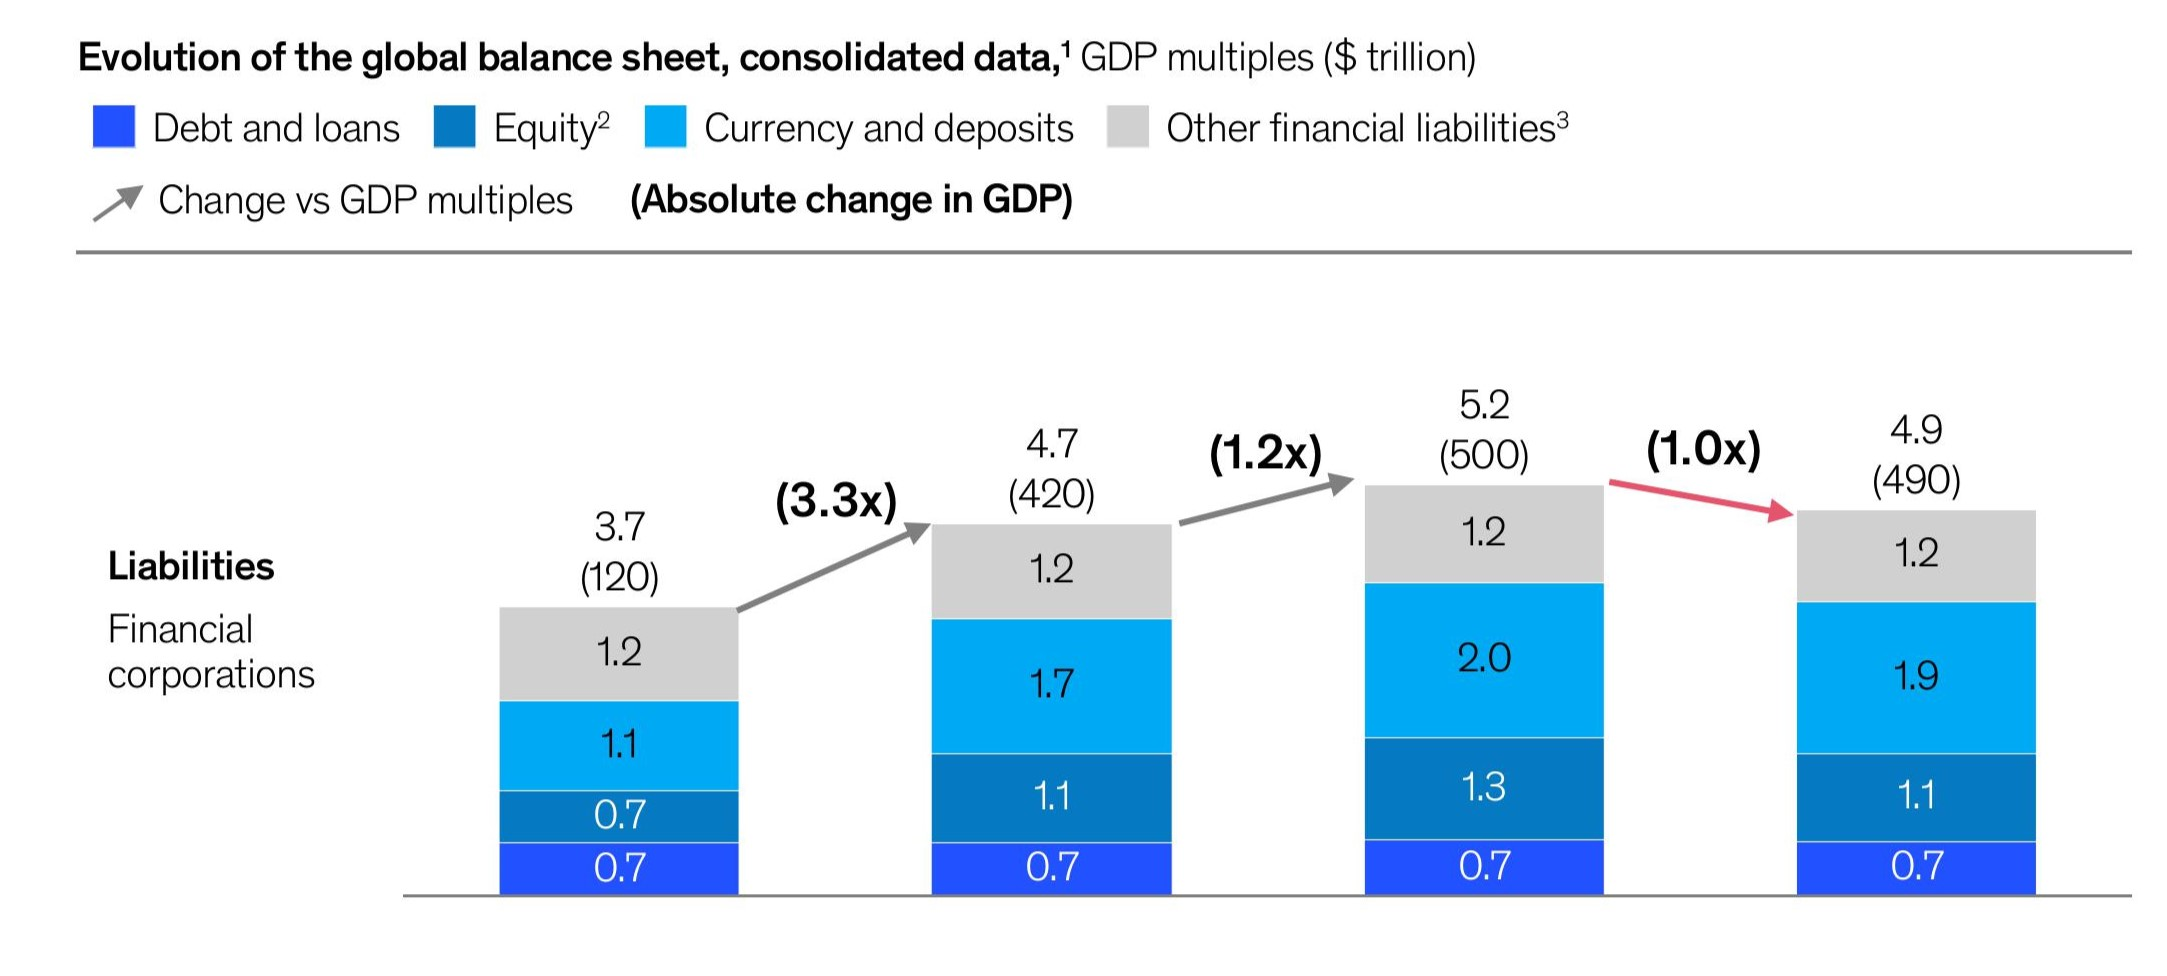

In [7]:
display(Image(filename="images_for_testing/charts/plot_5.jpg"))

In [8]:
Talk_with_llama_3_2_vision('Describe the content of the given image',

                           'images_for_testing/charts/plot_5.jpg')

The infographic presents a comprehensive analysis of the global balance sheet, consolidated across all countries and regions, highlighting trends in debt and equity. The data is organized into two sections: liabilities and GDP.

**Liabilities Section**

*   The section features a bar graph illustrating the evolution of global liabilities over time.
    *   **Debt and Loans**: Represented by blue bars, indicating a significant increase from 3.7 (120) to 4.9 (490).
        *   Absolute change: +1.2
    *   **Equity**: Shown in dark blue, with a notable decrease from 1.2x to 1.0x.
        *   Absolute change: -0.2
    *   **Currency and Deposits**: Represented by light blue bars, remaining relatively stable at 5.2 (500).

**GDP Section**

*   The section includes three bar graphs displaying the evolution of GDP across different categories.
    *   **Debt and Loans**: Represented by blue bars, showing a slight increase from 4.7 (420) to 5.2 (500).
        *   Absolute change: +0.5
    *   **Equity**: Shown in dark blue, with a notable decrease from 1.2x to 1.0x.
        *   Absolute change: -0.2
    *   **Currency and Deposits**: Represented by light blue bars, remaining relatively stable at 4.9 (490).

In summary, the infographic provides a detailed analysis of the global balance sheet, highlighting trends in debt and equity across various categories. The data suggests that there has been an increase in debt and loans, while equity has decreased. Additionally, currency and deposits have remained relatively stable. These findings offer valuable insights into the evolving landscape of global finance.

Execution time: 118.15 seconds


In [10]:
Talk_with_llama_3_2_vision('Extract the content of the image into a table in a markdown format',

                           'images_for_testing/charts/plot_5.jpg')

### Evolution of the Global Balance Sheet, Consolidated Data

| Category | Description |
| --- | --- |
| **Debt and Loans** |  |
|  | Change vs. GDP multiples |
|  | Absolute change in absolute values ($trillion) |
| **Equity** |  |
|  | Change vs. GDP multiple |
|  | Absolute change in absolute values ($trillion) |
| **Currency and Deposits** |  |
|  | Change vs. GDP multiple |
|  | Absolute change in absolute values ($trillion) |

### Liabilities

| Category | Description |
| --- | --- |
| **Financial Corporations** |  |
|  | Change vs. GDP multiples |
|  | Absolute change in absolute values ($trillion) |

### Assets

| Category | Description |
| --- | --- |
| **Debt and Loans** |  |
|  | Change vs. GDP multiples |
|  | Absolute change in absolute values ($trillion) |
| **Equity** |  |
|  | Change vs. GDP multiple |
|  | Absolute change in absolute values ($trillion) |

### Currency and Deposits

| Category | Description |
| --- | --- |
|  | Change vs. GDP multiple |
|  | Absolute change in absolute values ($trillion) |

The above table summarizes the data presented in the image, which illustrates the evolution of the global balance sheet from 2014 to an unspecified date. The data is organized into categories such as debt and loans, equity, currency and deposits, liabilities, assets, and GDP multiples. Each category has a change vs. GDP multiple and an absolute change in absolute values ($trillion) for both financial corporations and other entities.

Execution time: 107.44 seconds


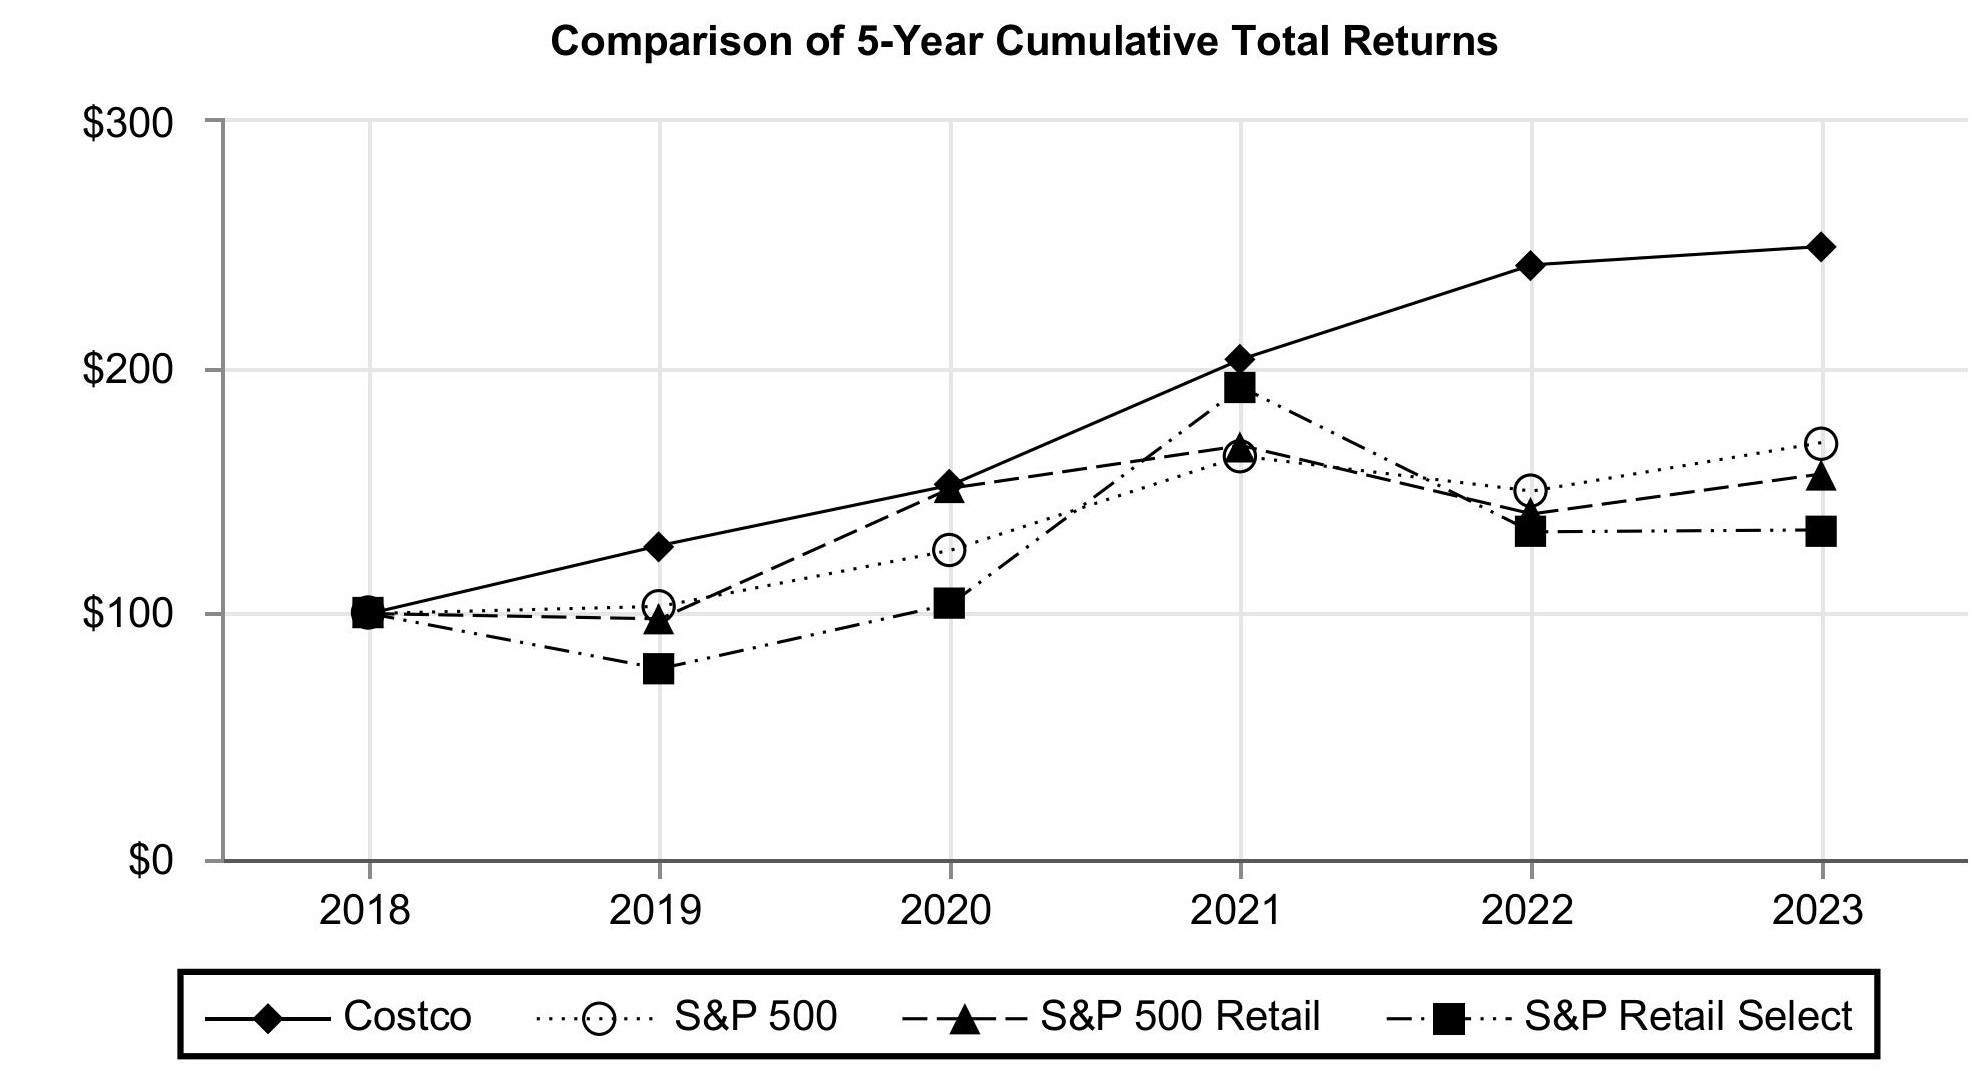

In [11]:
display(Image(filename="images_for_testing/charts/plot_8.jpg"))

In [12]:
Talk_with_llama_3_2_vision('Describe the content of the given image',

                           'images_for_testing/charts/plot_8.jpg')

The image presents a line graph comparing the 5-year cumulative total returns of four investment options: Costco, S&P 500, S&P 500 Retail, and S&P Retail Select. The graph spans from 2018 to 2023.

*   **Line Graph**
    *   The x-axis represents the years from 2018 to 2023.
    *   The y-axis displays the cumulative total returns in dollars.
    *   Each investment option is represented by a distinct line on the graph:
        *   Costco (black)
        *   S&P 500 (dotted black)
        *   S&P 500 Retail (dark gray)
        *   S&P Retail Select (light gray)
*   **Data Points**
    *   The graph includes data points for each investment option at regular intervals, marked by small squares.
    *   These data points indicate the cumulative total returns for each investment option at specific points in time.
*   **Labels and Legend**
    *   A legend below the graph explains the color coding used to represent each investment option.
    *   The labels on the x-axis and y-axis provide context for the data being presented.

In summary, the line graph provides a visual comparison of the 5-year cumulative total returns of four different investment options over the period from 2018 to 2023.

Execution time: 85.69 seconds


In [13]:
Talk_with_llama_3_2_vision('Convert the content of the given image into a table',

                           'images_for_testing/charts/plot_8.jpg')

The image presents a line graph comparing the 5-year cumulative total returns of four different investment options: Costco, S&P 500, S&P 500 Retail, and S&P Retail Select. The graph spans from 2018 to 2023.

**Key Points:**

*   **Costco:** 
    *   Starting value in 2018: approximately $100
    *   Ending value in 2023: around $300
    *   Growth rate: approximately 200%
*   **S&P 500:** 
    *   Starting value in 2018: around $100
    *   Ending value in 2023: about $250
    *   Growth rate: roughly 150%
*   **S&P 500 Retail:** 
    *   Starting value in 2018: approximately $100
    *   Ending value in 2023: around $200
    *   Growth rate: about 100%
*   **S&P Retail Select:** 
    *   Starting value in 2018: roughly $100
    *   Ending value in 2023: approximately $150
    *   Growth rate: approximately 50%

**Comparison of Investment Options:**

The data indicates that Costco has outperformed the other three investment options over the past five years, with a growth rate of approximately 200%. The S&P 500 and S&P 500 Retail have growth rates of roughly 150% and 100%, respectively. In contrast, the S&P Retail Select has a relatively lower growth rate of around 50%.

**Conclusion:**

Based on the provided data, Costco appears to be the most lucrative investment option among the four options compared, with a significant growth rate over the past five years. However, it is essential to note that this analysis only includes historical performance and does not account for potential future market fluctuations or other factors that may impact investment returns.

**Table:**

| Investment Option | Starting Value (2018) | Ending Value (2023) | Growth Rate |
| --- | --- | --- | --- |
| Costco | $100 | $300 | 200% |
| S&P 500 | $100 | $250 | 150% |
| S&P 500 Retail | $100 | $200 | 100% |
| S&P Retail Select | $100 | $150 | 50% |

Please note that the values are approximate and based on a visual analysis of the graph.

Execution time: 155.30 seconds


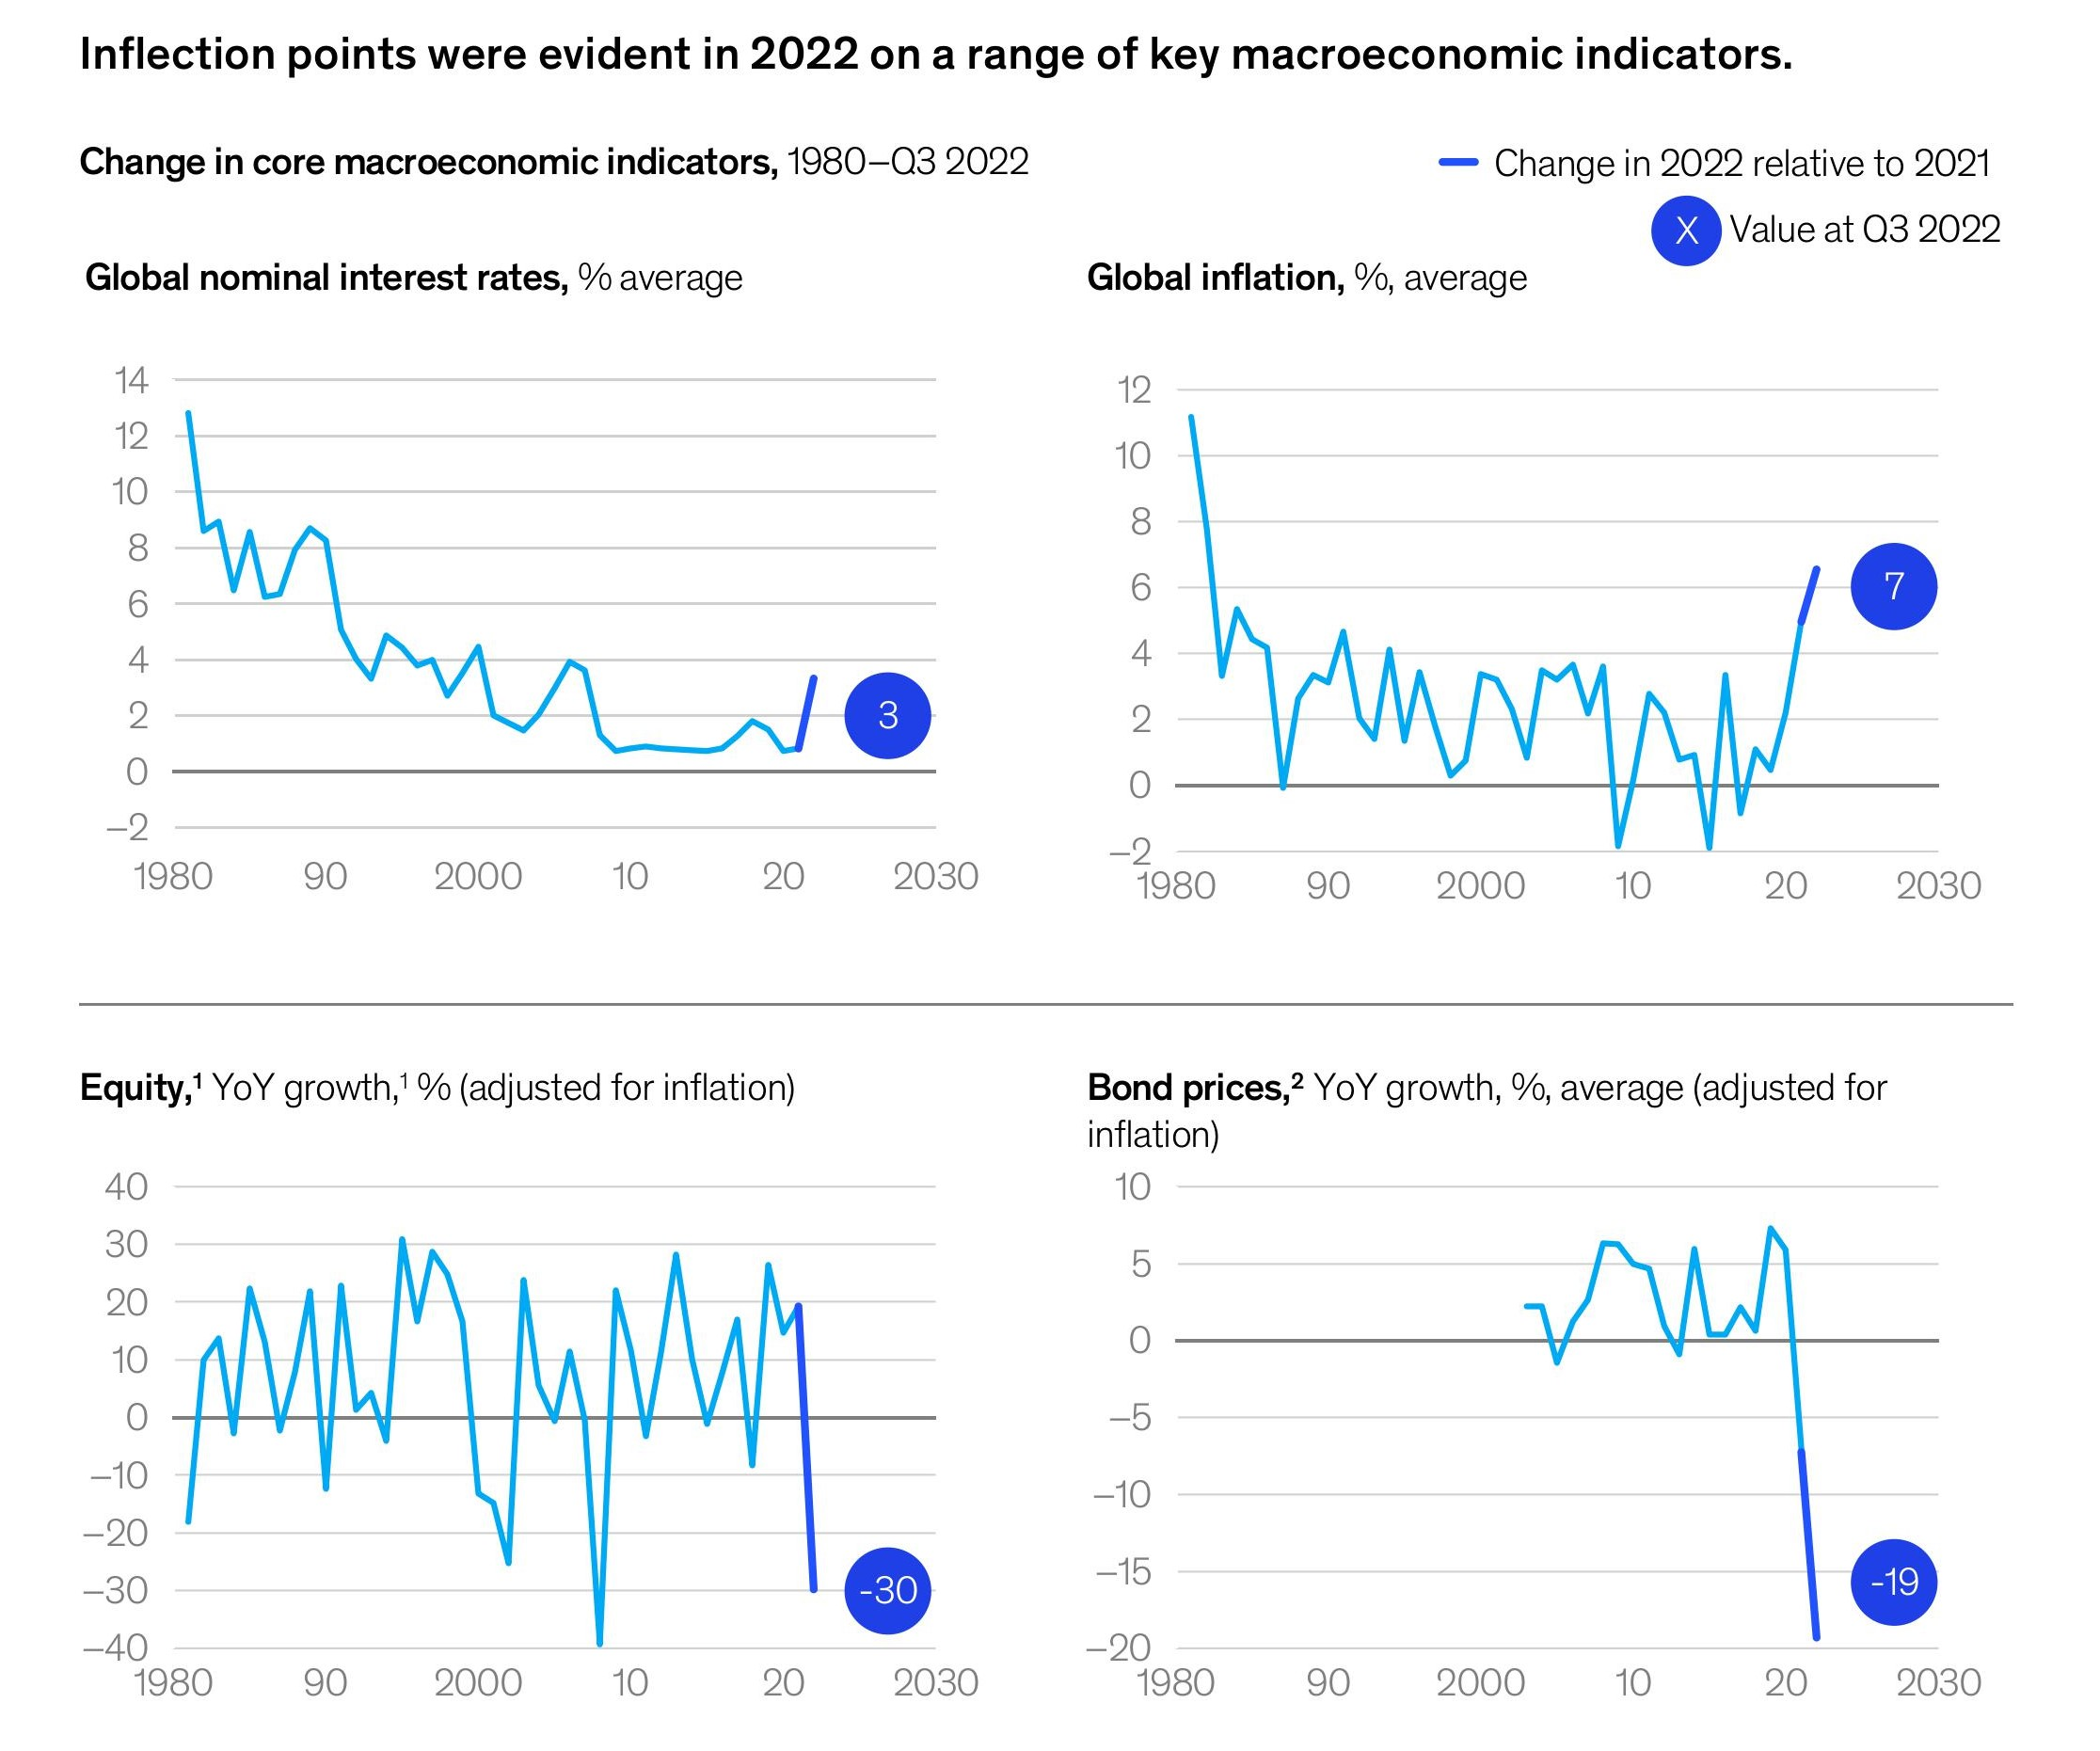

In [14]:
display(Image(filename="images_for_testing/charts/plot_10.jpg"))

In [15]:
Talk_with_llama_3_2_vision('Describe the content of the given image',

                           'images_for_testing/charts/plot_10.jpg')

The infographic presents a comprehensive analysis of global macroeconomic indicators, highlighting key trends and patterns observed in 2022. The data is presented through four distinct graphs, each focusing on a specific aspect of macroeconomics.

*   **Global Nominal Interest Rates**
    *   This graph illustrates the change in core macroeconomic indicators from 1980 to Q3 2022.
    *   The trend line reveals a notable decline in global nominal interest rates over this period, with a significant drop observed between 2019 and 2021.
*   **Global Inflation**
    *   This graph displays the percentage change in global inflation relative to its average value at Q3 2022.
    *   The data indicates a substantial increase in global inflation since 1980, with a particularly sharp rise observed between 2020 and 2022.
*   **Equity (Year-over-Year Growth)**
    *   This graph shows the year-over-year growth rate of equity markets from 1980 to Q3 2022.
    *   The trend line reveals a fluctuating pattern, with periods of high growth followed by declines.
    *   Notably, there was a significant decline in equity market growth between 2000 and 2015.
*   **Bond Prices (Year-over-Year Growth)**
    *   This graph illustrates the year-over-year growth rate of bond prices from 1980 to Q3 2022.
    *   The data indicates a relatively stable trend, with minor fluctuations throughout the period.

In summary, the infographic provides a detailed examination of global macroeconomic indicators in 2022, highlighting trends and patterns in interest rates, inflation, equity markets, and bond prices. The data suggests that while some indicators have experienced significant changes, others have remained relatively stable over time.

Execution time: 116.15 seconds


In [16]:
Talk_with_llama_3_2_vision('Can you convert the given plot into a table?',

                           'images_for_testing/charts/plot_10.jpg')

Sure, here is a table version of the given plot:

| Category | Change in 1980-2022 | Change in 2022 relative to 2021 |
| --- | --- | --- |
| Global Nominal Interest Rates | ~3% | ~3% |
| Global Inflation | ~7% | ~7% |
| Equity Growth (YoY) | ~30% | ~30% |
| Bond Prices | ~19% | ~19% |

Please let me know if you'd like me to modify the table in any way.

Execution time: 35.46 seconds


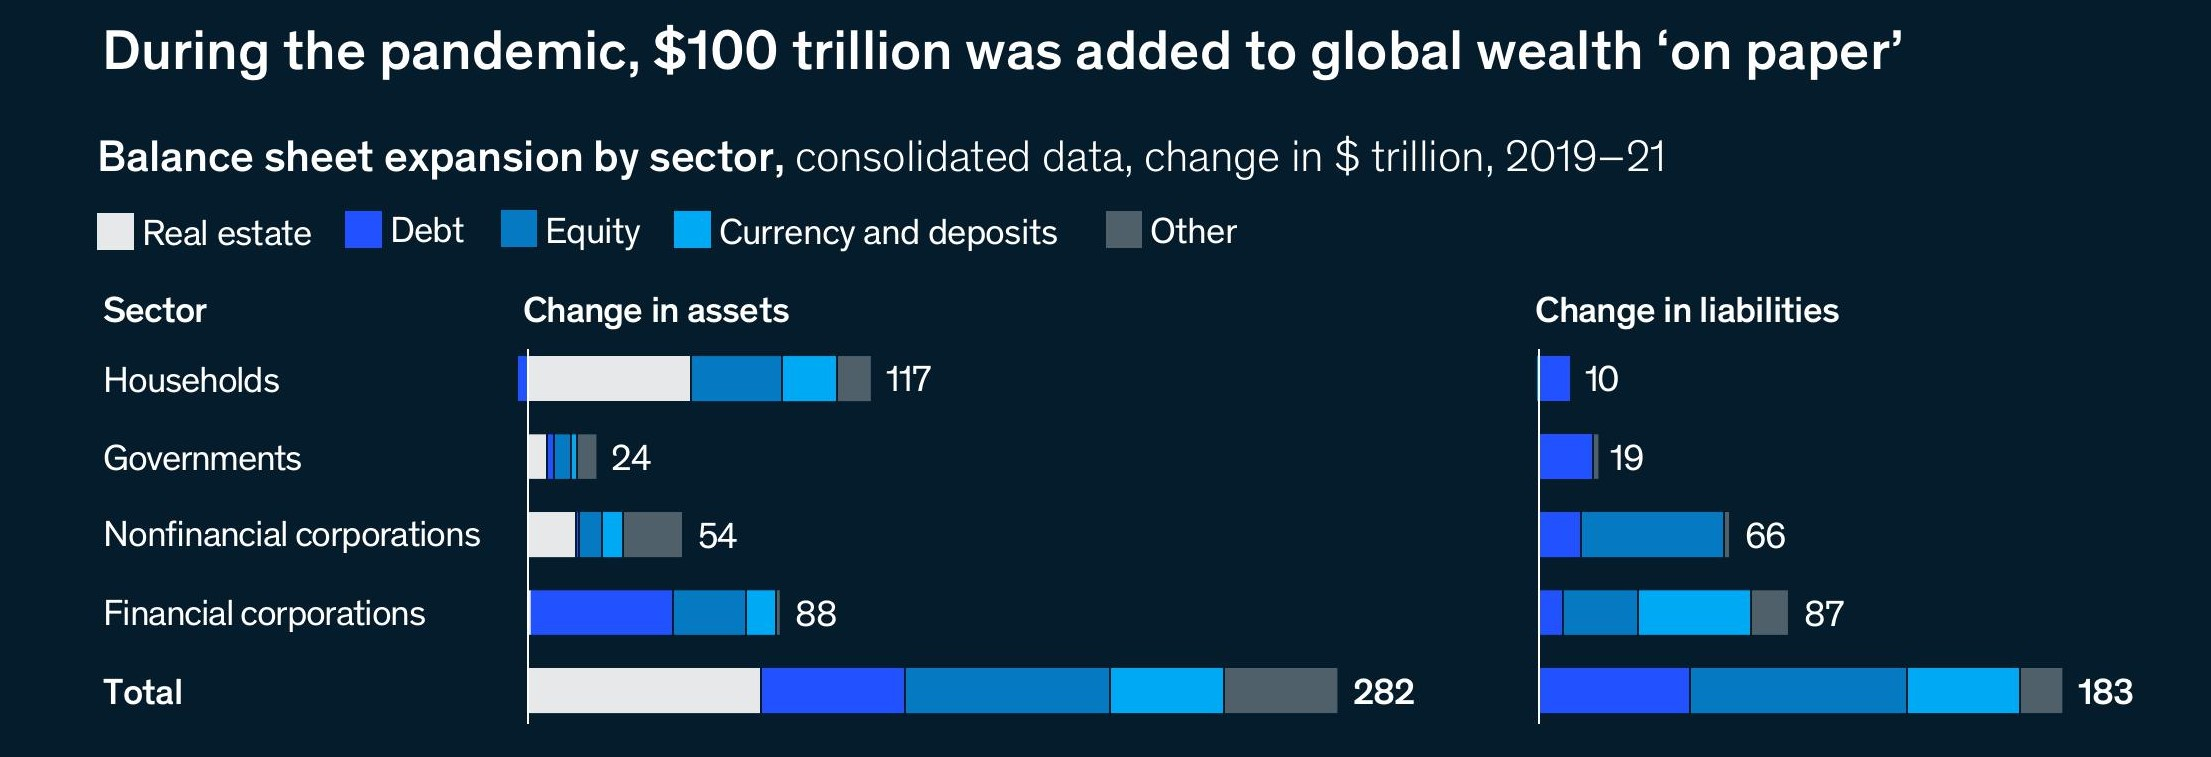

In [17]:
display(Image(filename="images_for_testing/charts/plot_4.jpg"))

In [18]:
Talk_with_llama_3_2_vision('Describe the content of the given image',

                           'images_for_testing/charts/plot_4.jpg')

The image presents a comprehensive overview of the global wealth expansion during the pandemic, with a focus on balance sheet growth across various sectors. The data is visualized through bar graphs and charts, providing a clear and concise representation of the trends and patterns in global wealth.

Here are the main points from the image:

* **Balance Sheet Expansion**
	+ Real estate: $100 trillion
	+ Debt: $54 trillion
	+ Equity: $24 trillion
	+ Currency and deposits: $17 trillion
	+ Other: $5 trillion
* **Sector Breakdown**
	+ Households: 24% of total balance sheet expansion
	+ Governments: 15%
	+ Nonfinancial corporations: 12%
	+ Financial corporations: 9%
	+ Total: 100%
* **Change in Assets and Liabilities**
	+ Real estate: $282 trillion (assets) vs. $8 trillion (liabilities)
	+ Debt: $183 trillion (assets) vs. $66 trillion (liabilities)
	+ Equity: $87 trillion (assets) vs. $19 trillion (liabilities)
	+ Currency and deposits: $33 trillion (assets) vs. $10 trillion (liabilities)
	+ Other: $13 trillion (assets) vs. $4 trillion (liabilities)

In summary, the image highlights the significant growth in global wealth during the pandemic, driven primarily by real estate and debt. The sector breakdown shows that households were the largest contributor to balance sheet expansion, followed closely by governments and nonfinancial corporations. The change in assets and liabilities reveals a substantial increase in assets across all sectors, with a corresponding decrease in liabilities. Overall, the image provides valuable insights into the dynamics of global wealth during this period.

Execution time: 111.59 seconds


In [19]:
Talk_with_llama_3_2_vision('Convert the content of the image into a table format',

                           'images_for_testing/charts/plot_4.jpg')

The image presents a comprehensive visual representation of the global wealth expansion during the pandemic, with a focus on balance sheet expansion by sector. The data is organized into three main sections: Balance Sheet Expansion by Sector, Change in Liabilities, and Total.

**Balance Sheet Expansion by Sector**

*   **Real Estate**
    *   Color-coded as white
    *   Represents $100 trillion added to global wealth
*   **Debt**
    *   Color-coded as blue
    *   Accounts for 24% of total expansion
*   **Equity**
    *   Color-coded as light blue
    *   Accounts for 54% of total expansion
*   **Currency and Deposits**
    *   Color-coded as gray
    *   Accounts for the remaining 22% of total expansion

**Change in Liabilities**

*   **Non-Financial Corporations**
    *   Color-coded as dark blue
    *   Experienced a $117 trillion increase in liabilities
*   **Financial Corporations**
    *   Color-coded as light gray
    *   Experienced an $88 trillion increase in liabilities

**Total**

*   The total balance sheet expansion is represented by the sum of all sectors, with real estate accounting for 24%, debt accounting for 54%, and currency and deposits accounting for 22%.
*   The change in liabilities is calculated by adding the increases in non-financial corporations' and financial corporations' liabilities.

In summary, the image effectively illustrates the significant expansion of global wealth during the pandemic, with a focus on balance sheet growth across various sectors. The data highlights the substantial increases in real estate, debt, equity, and currency and deposits, as well as the notable changes in liabilities for non-financial corporations and financial corporations.

Execution time: 106.16 seconds


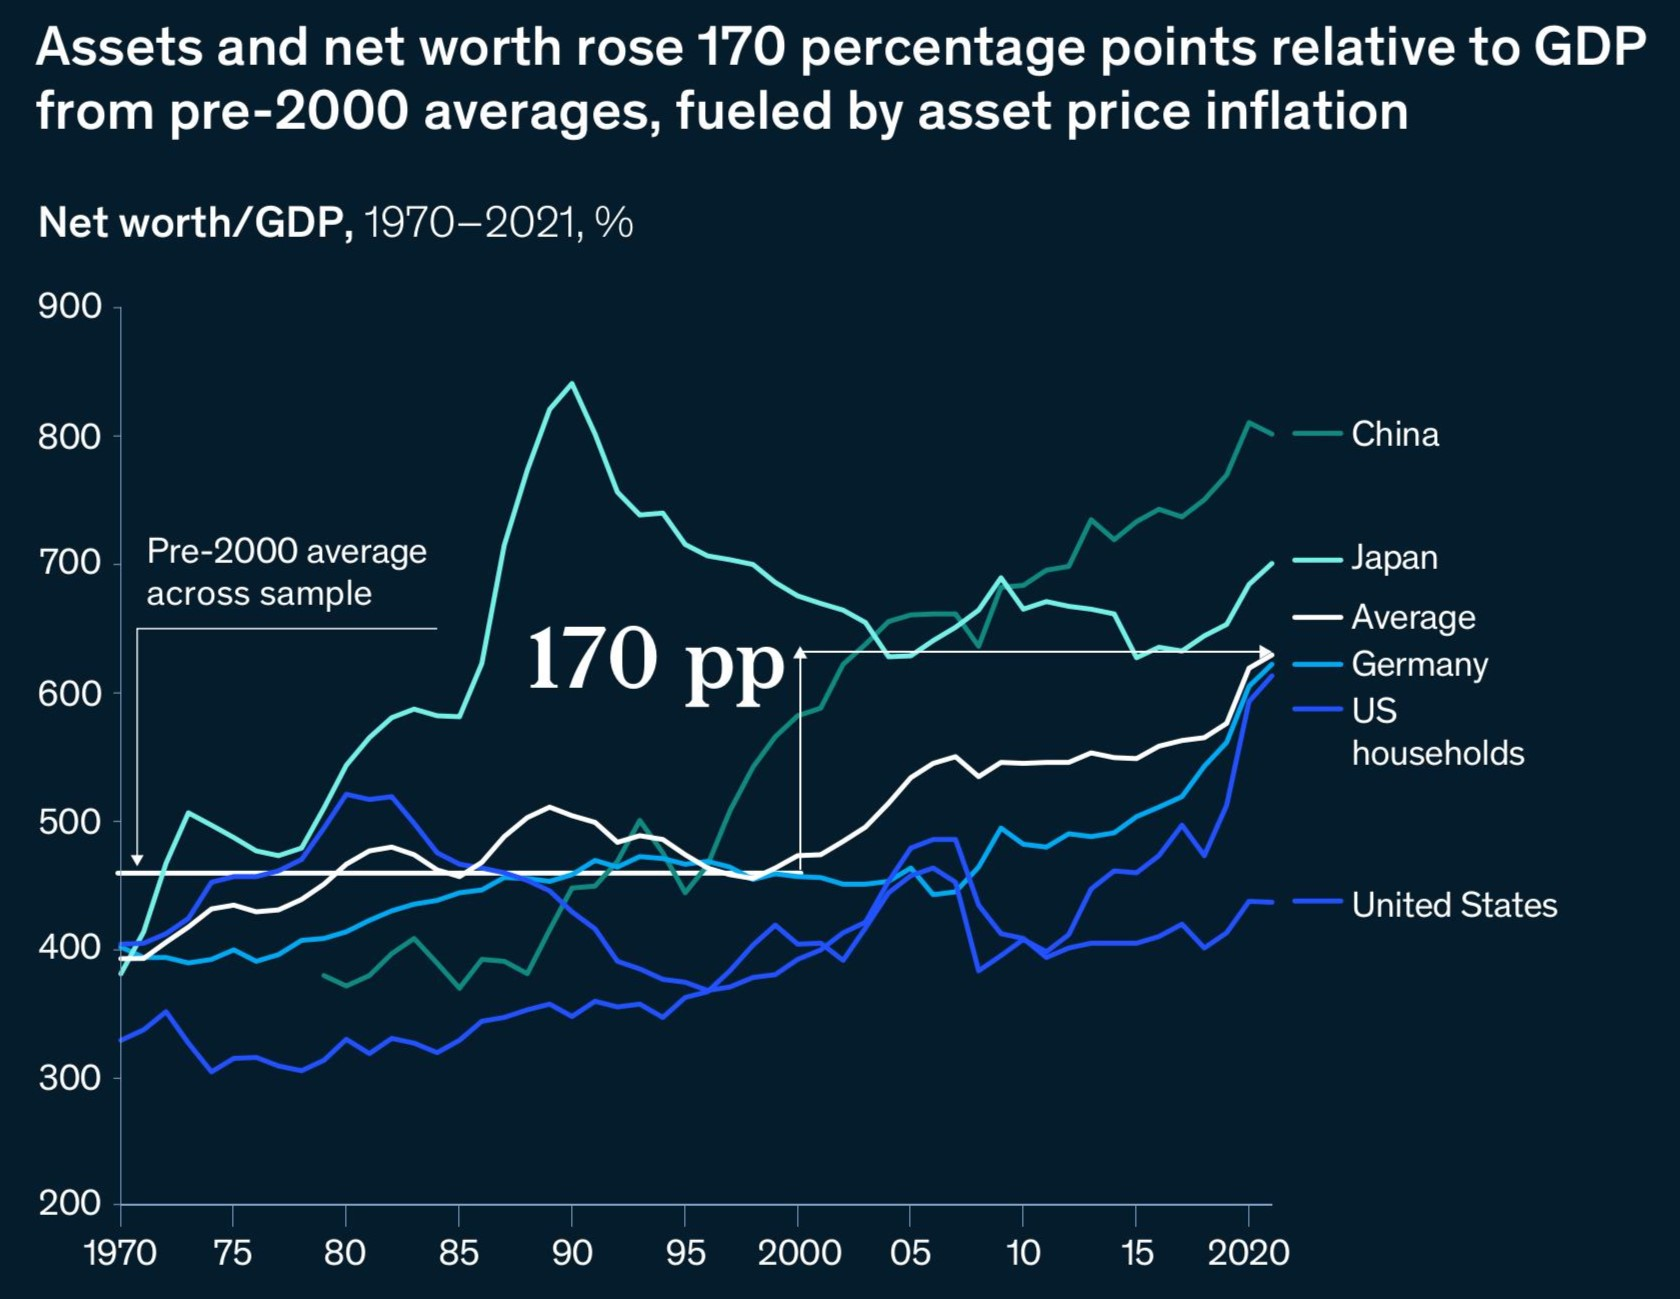

In [20]:
display(Image(filename="images_for_testing/charts/plot_3.jpg"))

In [21]:
Talk_with_llama_3_2_vision('Describe the content of the given image',

                           'images_for_testing/charts/plot_3.jpg')

The infographic presents a line graph illustrating the relationship between assets and net worth, expressed as a percentage of GDP, relative to pre-2000 averages. The data spans from 1970 to 2021.

**Key Features:**

*   **Y-axis:** Net worth/GDP (1970–2021), represented in percentages.
*   **X-axis:** Timeframe, spanning from 1970 to 2021.
*   **Lines:** Each line represents a country or category:
    *   China
    *   Japan
    *   Average
    *   Germany
    *   United States
    *   US households

**Trends and Observations:**

*   The graph reveals that assets and net worth have increased significantly as a percentage of GDP over the past five decades.
*   Notably, China's line exhibits a sharp upward trend, surpassing Japan's in recent years.
*   The average for all countries shown has also risen substantially.

**Conclusion:**

The infographic effectively illustrates the growing proportion of assets and net worth relative to GDP across various countries. This visual representation provides valuable insights into global economic trends and patterns over the past five decades.

Execution time: 77.18 seconds


In [22]:
Talk_with_llama_3_2_vision('Extract the content of the given image into a table format',

                           'images_for_testing/charts/plot_3.jpg')

The image presents a line graph illustrating the relationship between assets and net worth, measured as 170 percentage points relative to GDP from pre-2000 averages, fueled by asset price inflation. The graph spans from 1970 to 2021.

**Key Features:**

*   **Line Graph:** The graph displays multiple lines representing different countries or groups of people.
*   **Color-Coded Lines:** Each line is color-coded to distinguish between various entities.
*   **Country Representation:** China, Japan, the United States, Germany, and other countries are represented by distinct colored lines.
*   **Group Representation:** US households, Average, Pre-2000 average across sample, and 170 pp are also depicted using different colors.
*   **Timeframe:** The graph covers a period from 1970 to 2021.
*   **Data Points:** Each line on the graph represents a specific entity's assets and net worth as a percentage of GDP over time.

**Table Representation:**

| Country/Group | Color |
| --- | --- |
| China | Green |
| Japan | Light Blue |
| US Households | Dark Blue |
| Average | White |
| Pre-2000 average across sample | Grey |
| 170 pp | Beige |

This table provides a concise summary of the entities represented on the graph, along with their corresponding colors.

Execution time: 79.14 seconds


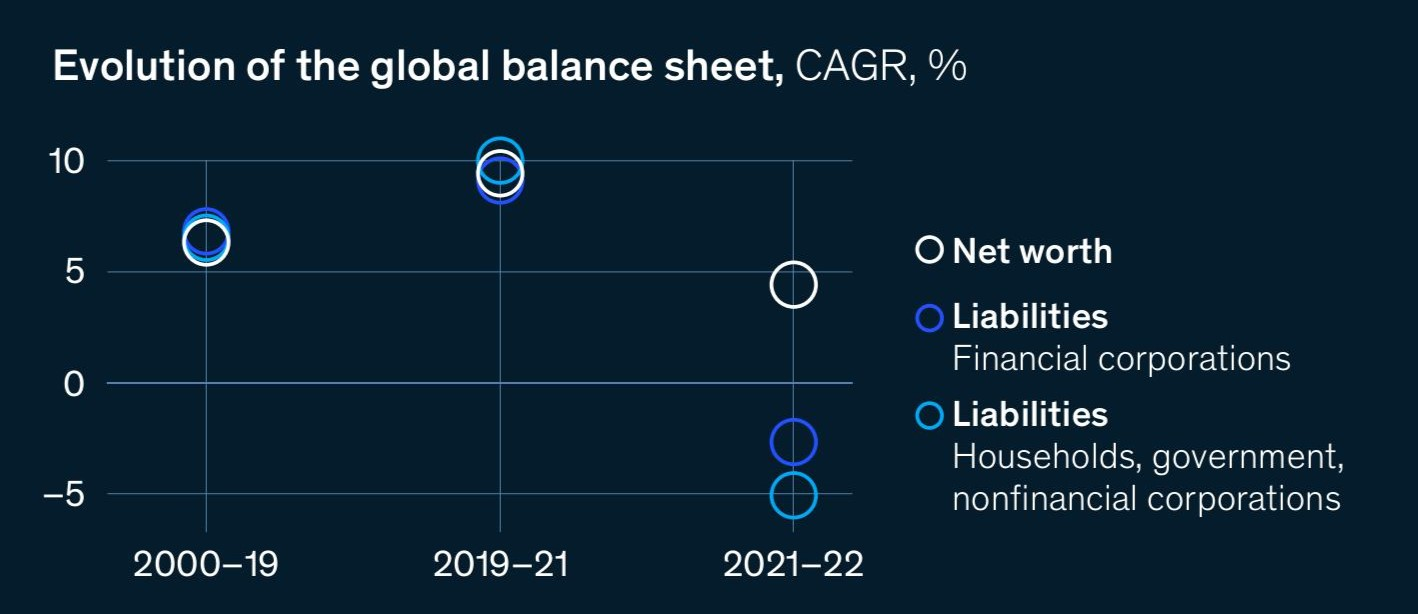

In [23]:
display(Image(filename="images_for_testing/charts/plot_1.jpg"))

In [24]:
Talk_with_llama_3_2_vision('What is the content of this image?',

                           'images_for_testing/charts/plot_1.jpg')

The image depicts an infographic illustrating the evolution of global balance sheets, featuring two line graphs that display data for 2000-2019 and 2021-22.

**Key Takeaways:**

*   **Global Balance Sheet Evolution:** The first graph shows a decline in net worth from approximately $10 trillion to around $5 trillion between 2000 and 2019.
*   **Net Worth Breakdown:** In contrast, the second graph indicates an increase in net worth from roughly $5 trillion to over $15 trillion for the same period.
*   **Financial Liabilities:** The data also reveals that financial liabilities have risen significantly, with a notable shift towards non-financial corporations and households.

**Conclusion:**

The infographic effectively illustrates the transformation of global balance sheets over time, highlighting both positive and negative trends. By examining these changes, we can gain valuable insights into the evolving nature of global finance.

Execution time: 59.04 seconds


In [25]:
Talk_with_llama_3_2_vision('Extract the content of the given plot into a table?',

                           'images_for_testing/charts/plot_1.jpg')

The image presents a graph illustrating the evolution of global balance sheets from 2000 to 2022. The graph is divided into two sections: the top section shows the net worth, liabilities, and financial corporations' net worth in terms of percentage change over time, while the bottom section displays the same data but focuses on households, government, and non-financial corporations.

Here are the main points from the image:

• **Net Worth**
	+ 2000-2019: 10%
	+ 2019-2022: 5%

• **Liabilities**
	+ Financial Corporations
		- 2000-2019: -5%
		- 2019-2022: 0%
	+ Households, Government, and Non-Financial Corporations
		- 2000-2019: -10%
		- 2019-2022: -5%

In summary, the graph shows that the net worth of global balance sheets has increased by 10% from 2000 to 2019 but decreased by 5% from 2019 to 2022. The liabilities of financial corporations have remained stable at around -5%, while those of households, government, and non-financial corporations have also remained stable at around -10%. Overall, the graph suggests that global balance sheets have become more unstable over time, with a significant increase in net worth followed by a decline.

Execution time: 90.31 seconds


### **Tables Understanding**

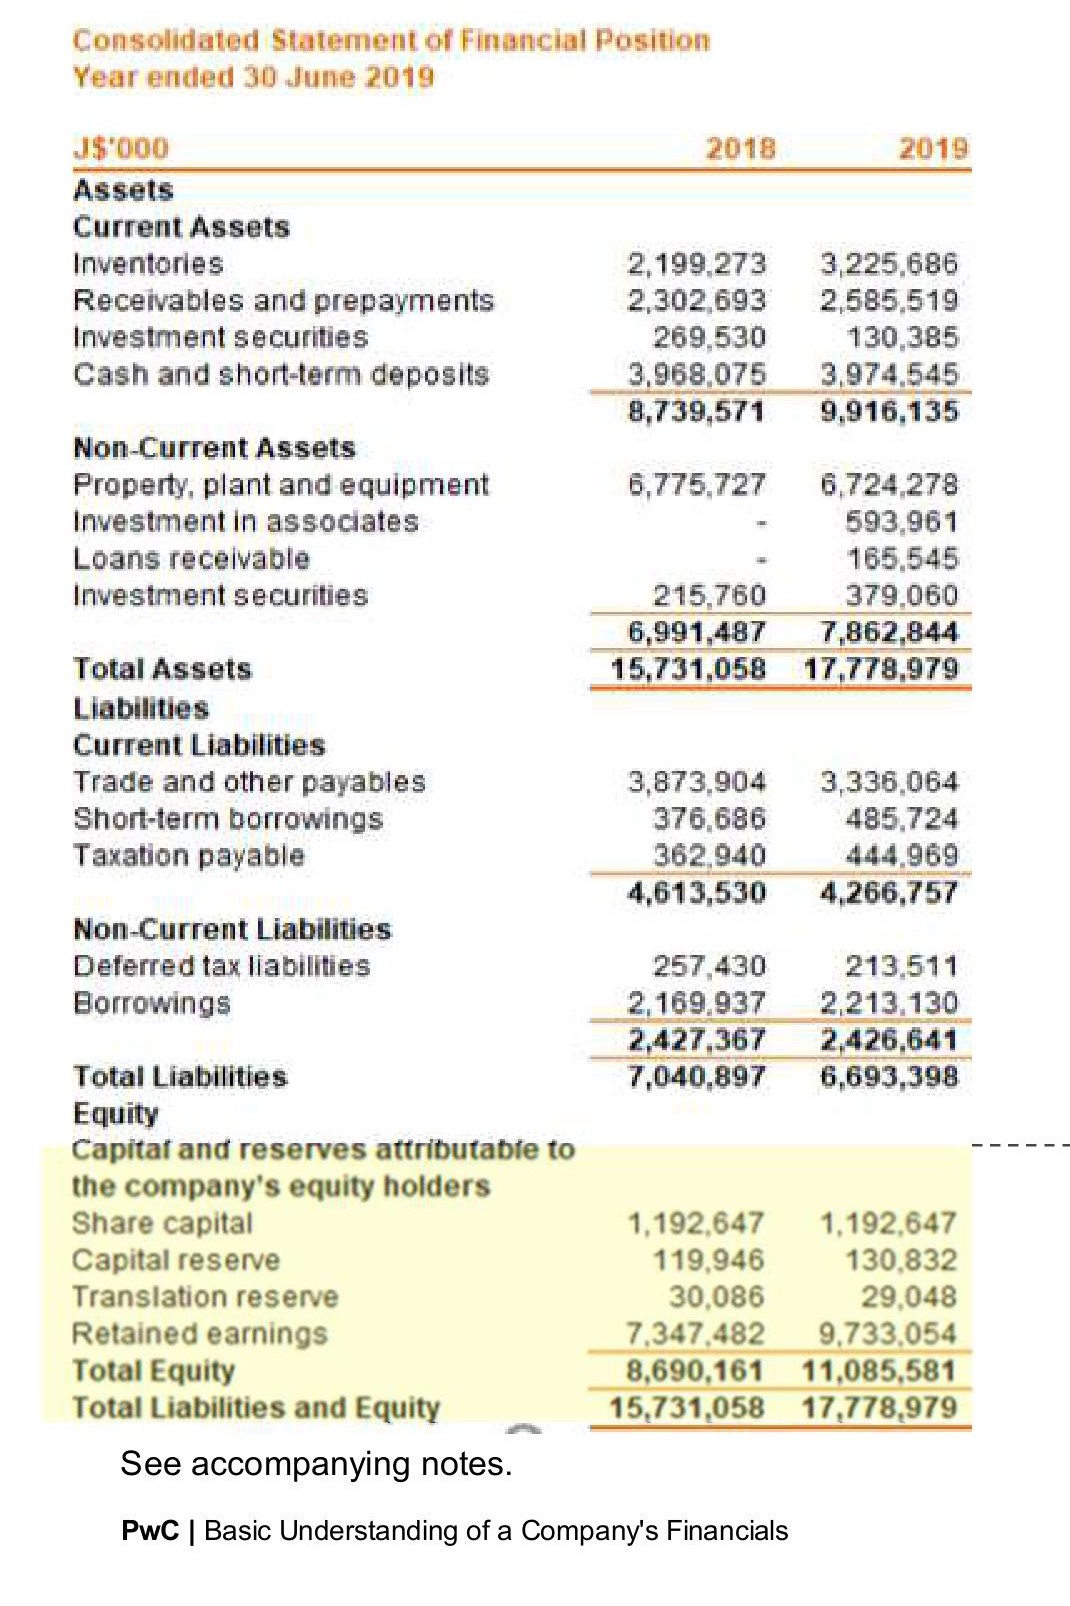

In [26]:
display(Image(filename="images_for_testing/tables/table_1.jpg"))

In [27]:
Talk_with_llama_3_2_vision('Give me an overview about the content of the given talbe',

                           'images_for_testing/tables/table_1.jpg')

The table provided is a Consolidated Statement of Financial Position for two consecutive years, 2018 and 2019. It presents various financial data, including assets, liabilities, equity, and other related information.

**Assets**

*   **Current Assets**
    *   Inventories: The company's inventory at the end of each year.
    *   Receivables and prepayments: Amounts owed to the company by its customers or suppliers.
    *   Investment securities: Investments in bonds, stocks, or other financial instruments.
    *   Cash and short-term deposits: Liquid assets available for immediate use.
*   **Non-Current Assets**
    *   Property, plant, and equipment: Long-term assets used in the business, such as buildings, machinery, and vehicles.
    *   Investment in associates: Investments in other companies where significant influence is maintained but control is not exercised.

**Liabilities**

*   **Current Liabilities**
    *   Trade and other payables: Amounts owed by the company to its suppliers or creditors.
    *   Short-term borrowings: Loans with maturities of less than one year.
    *   Taxation payable: Taxes owed to government authorities.
*   **Non-Current Liabilities**
    *   Long-term borrowings: Loans with maturities of more than one year.

**Equity**

*   **Share Capital**: The total amount of money invested by shareholders in the company.
*   **Retained Earnings**: Profits reinvested in the business rather than distributed as dividends.
*   **Reserves**: Various reserves created from retained earnings, such as share premium, deferred tax liabilities, and other items.

**Other Information**

*   **Capital and Reserves Attributable to Equity Holders of the Parent**: The total equity attributable to shareholders of the parent company (not applicable here since it's a consolidated statement).
*   **Non-Controlling Interests**: Minority interests in subsidiaries that are not owned by the parent company.

In summary, this table provides a comprehensive overview of a company's financial position at two points in time. It shows changes in assets, liabilities, and equity over the period, giving insight into the company's liquidity, solvency, and profitability.

Execution time: 142.05 seconds


In [28]:
Talk_with_llama_3_2_vision('Extract the table from the given image',

                           'images_for_testing/tables/table_1.jpg')

Sure, here is an extract from the image:

**Consolidated Statement of Financial Position**

* **Year ended 30 June 2019**
	+ Assets
		- Current Assets: 
			- Inventories: $2,199,273
			- Receivables and prepayments: $2,302,693
			- Investment securities: $269,530
			- Cash and short-term deposits: $3,968,075
	+ Non-current Assets:
		- Property, plant and equipment: $6,775,727
		- Investments in associates: $593,961
		- Loans receivable: $165,545
		- Investment securities: $215,760
	+ Total Assets: $17,778,979
* **Liabilities**
	+ Current Liabilities:
		- Trade and other payables: $3,873,904
		- Short-term borrowings: $376,686
		- Taxation payable: $362,940
		- Other current liabilities: $4,613,530
	+ Non-current Liabilities:
		- Deferred tax liabilities: $257,430
		- Trade and other payables: $2,169,937
		- Short-term borrowings: $2,427,367
		- Other non-current liabilities: $6,693,398
	+ Total Liabilities: $15,731,058
* **Equity**
	+ Share capital: $1,192,647
	+ Retained earnings: $8,690,161
	+ Other equity: $11,085,581
	+ Total Equity: $17,778,979

Execution time: 107.70 seconds


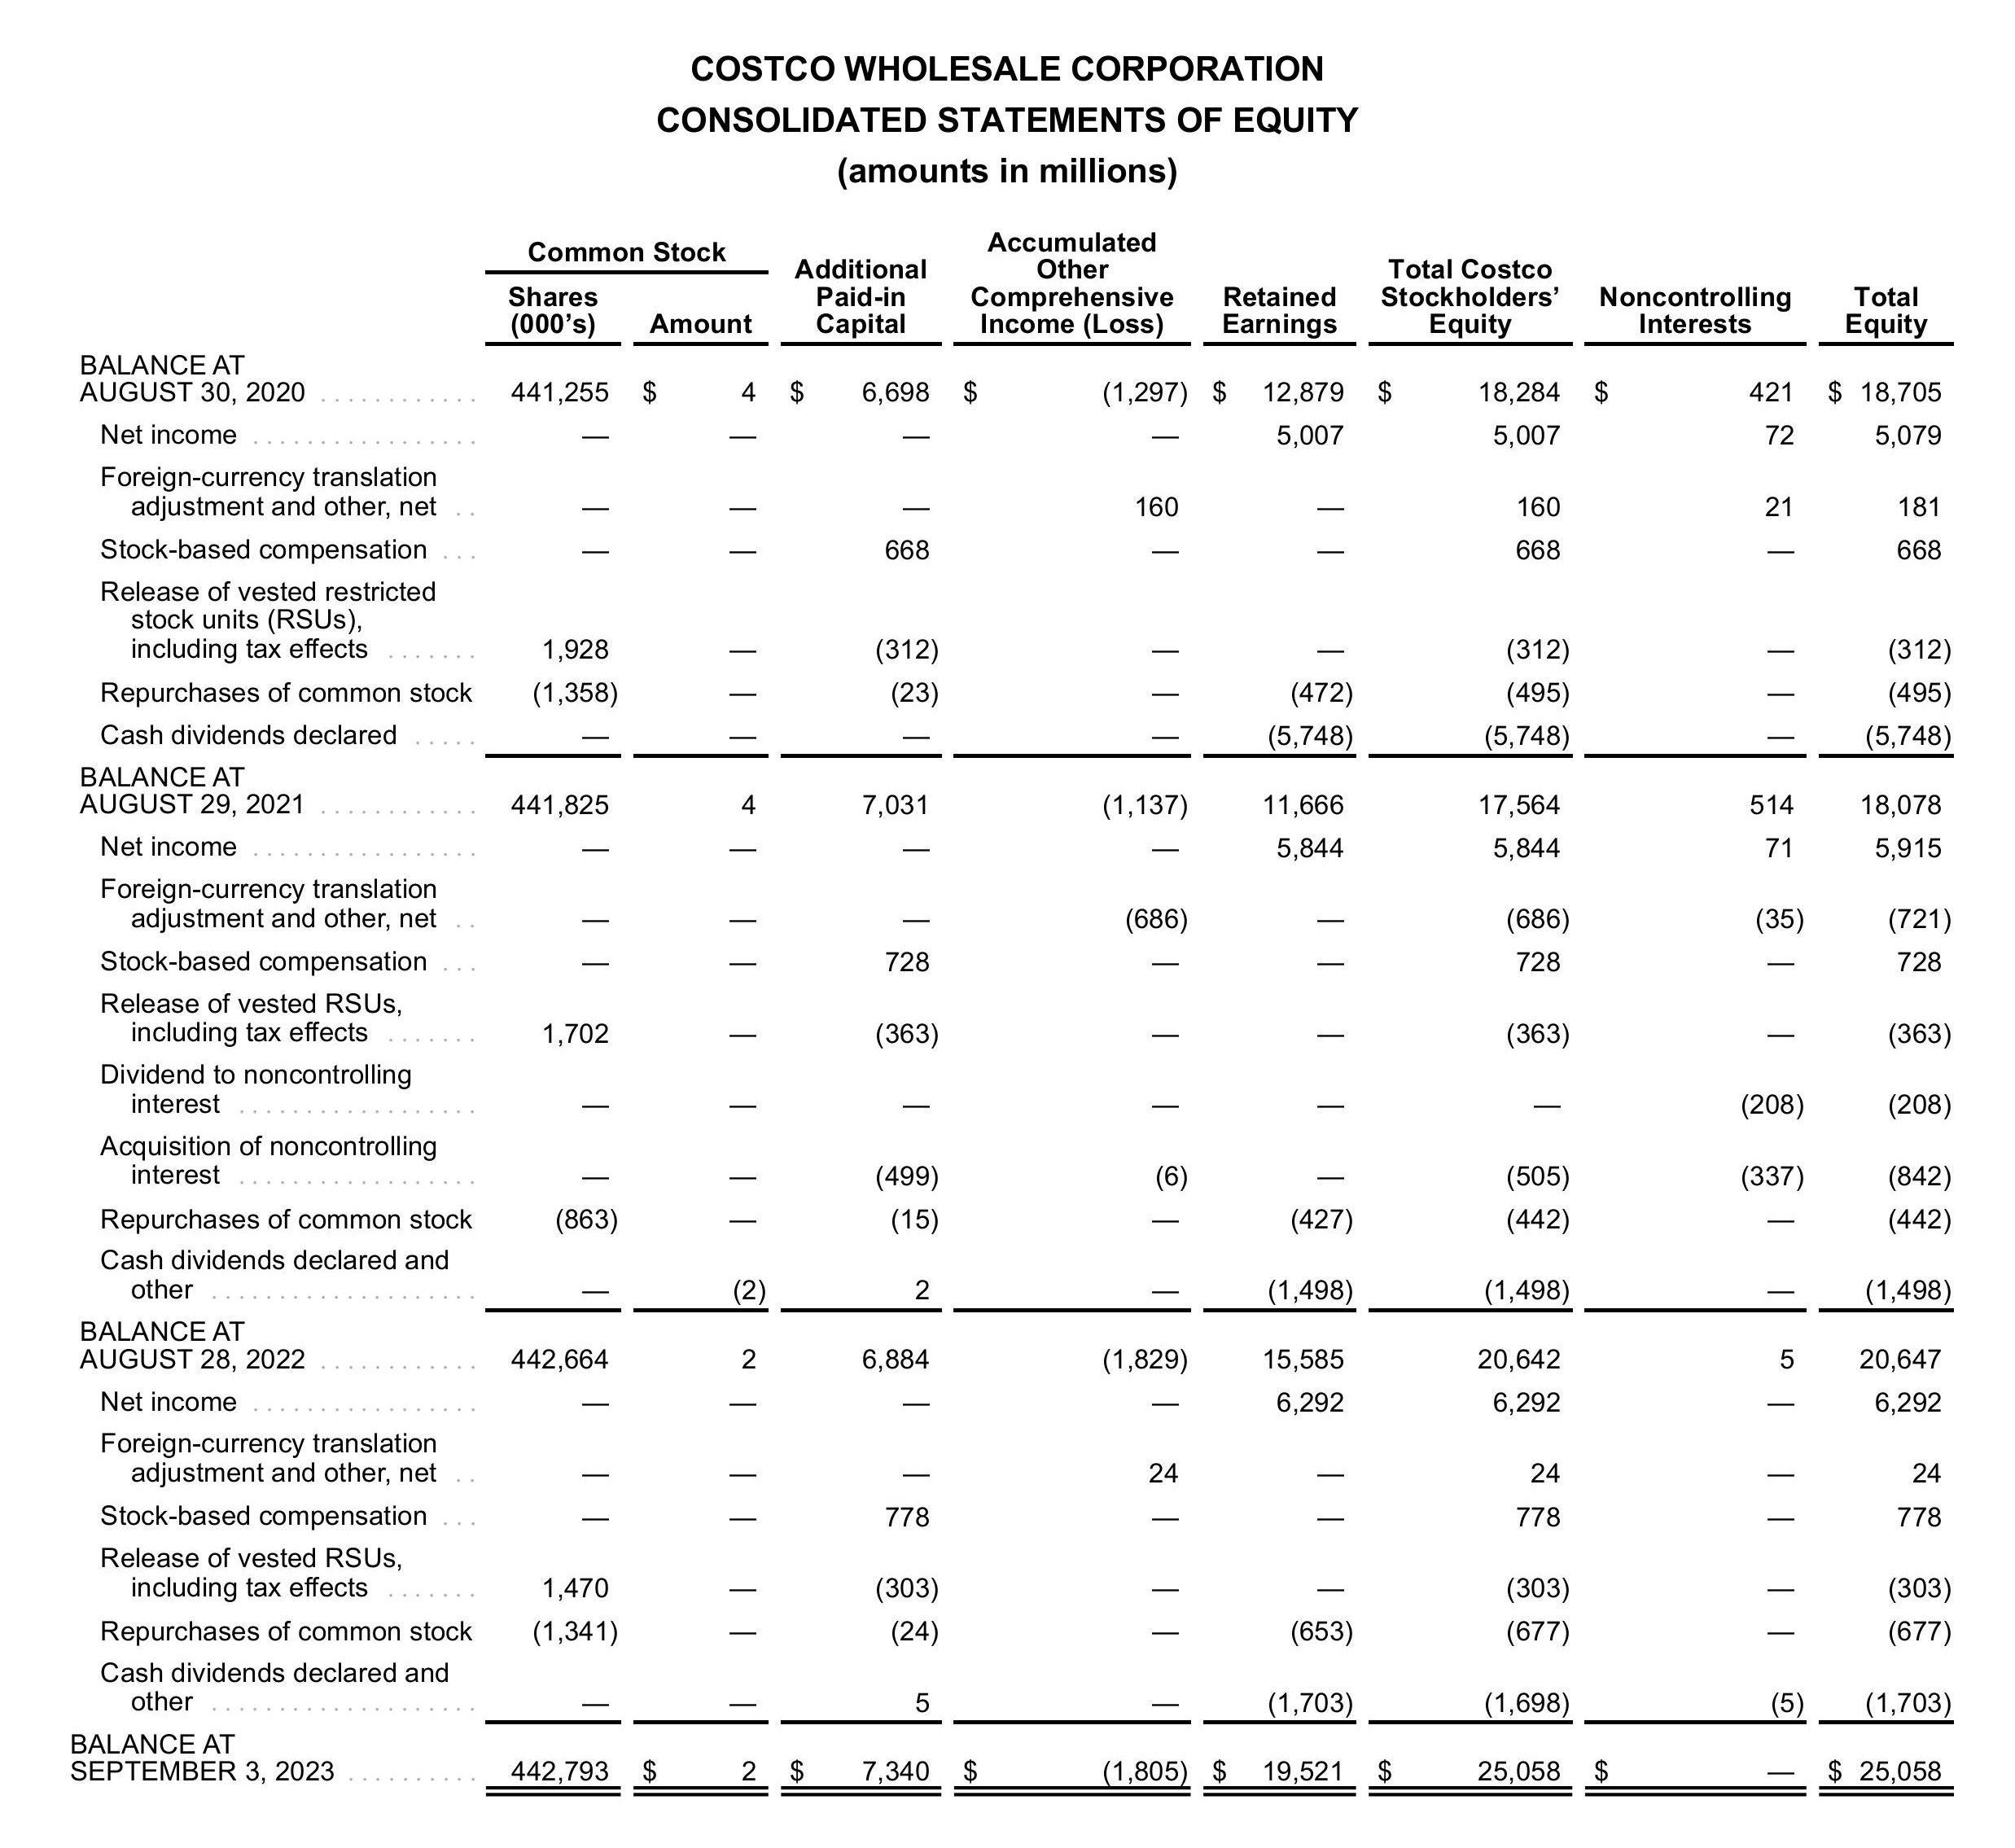

In [29]:
display(Image(filename="images_for_testing/tables/table_3.jpg"))

In [30]:
Talk_with_llama_3_2_vision('Give me an overview about the content of the given talbe',

                           'images_for_testing/tables/table_3.jpg')

The table provided is a Consolidated Statements of Equity (Balance Sheet) for Costco Wholesale Corporation, detailing its equity position at various points in time. It outlines the company's assets and liabilities as well as its retained earnings, common stock, and dividends paid.

**Key Components:**

*   **Common Stock**: Represents the ownership interest in the corporation.
*   **Retained Earnings**: Accumulated profits reinvested into the business.
*   **Dividends Paid**: Amounts distributed to shareholders from retained earnings.
*   **Total Equity**: The sum of common stock, retained earnings, and dividends paid.

**Changes Over Time:**

The table shows changes in these components over different time periods:

*   From August 30, 2020, to September 3, 2023
*   It highlights the growth or decrease in each component during this period.

**Insights:**

This information can be used by investors and analysts to evaluate Costco's financial health, assess its ability to generate profits, pay dividends, and distribute retained earnings.

Execution time: 67.69 seconds


In [31]:
Talk_with_llama_3_2_vision('Extract the table from the given image',

                           'images_for_testing/tables/table_3.jpg')

**Table Extract: Consolidated Statements of Equity (Costco Wholesale Corporation)**

| **Common Stock** | **Shares (000's)** | **Amount** |
| --- | --- | --- |
| BALANCE AT AUGUST 30, 2020 | 441,255 | $421 |
| BALANCE AT AUGUST 29, 2021 | 441,825 | $514 |

The table is a simplified version of the provided image. It presents two rows, representing the balance at August 30, 2020, and August 29, 2021.

**Columns:**

*   **Common Stock**: The type of stock being referenced.
*   **Shares (000's)**: The number of shares in thousands.
*   **Amount**: The total amount associated with the common stock.

**Rows:**

*   **BALANCE AT AUGUST 30, 2020**: This row represents the balance at August 30, 2020.
*   **BALANCE AT AUGUST 29, 2021**: This row represents the balance at August 29, 2021.

**Data:**

| **Common Stock** | **Shares (000's)** | **Amount** |
| --- | --- | --- |
| BALANCE AT AUGUST 30, 2020 | 441,255 | $421 |
| BALANCE AT AUGUST 29, 2021 | 441,825 | $514 |

This table provides a concise overview of the consolidated statements of equity for Costco Wholesale Corporation at two specific dates: August 30, 2020, and August 29, 2021.

Execution time: 96.09 seconds


### **Receipts Understanding**

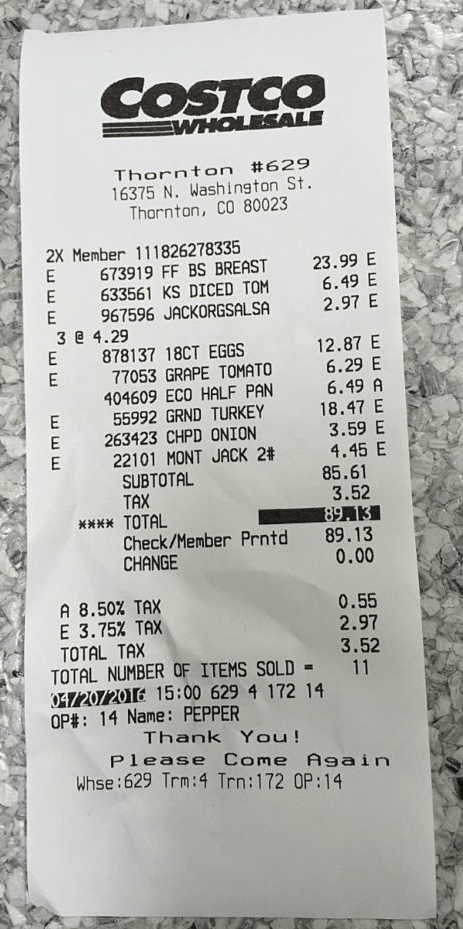

In [32]:
display(Image(filename="images_for_testing/receipts/8.jpg"))

In [33]:
Talk_with_llama_3_2_vision('Describe the content of the given image',

                           'images_for_testing/receipts/8.jpg')

The image displays a receipt from Costco Wholesale, featuring a list of items purchased and their corresponding prices. The receipt is printed on white paper with black ink.

* **Costco Logo**
	+ Located at the top-left corner of the receipt
	+ Features the word "COSTCO" in large letters, followed by "WHOLESALE" in smaller letters underneath
* **Itemized List**
	+ Lists 11 items purchased, including:
		- 2X Member: 111826278335
		- FF BS Breast: $23.99
		- KS Diced Tom: $6.49
		- Jacksalsa: $2.97
		- Grape Tomato: $12.87
		- Eco Half Pan: $6.29
		- Grand Turkey: $18.47
		- CHPD Onion: $3.59
		- Mont Jack 2#: $4.45
* **Subtotal and Tax**
	+ Subtotal: $85.61
	+ Sales tax: $3.52 (8.50%)
* **Total**
	+ Total cost of all items purchased: $89.13

The receipt also includes a message at the bottom, thanking the customer for their business and inviting them to return to Costco. Overall, the image provides a clear and detailed record of the customer's purchase at Costco Wholesale.

Execution time: 91.72 seconds


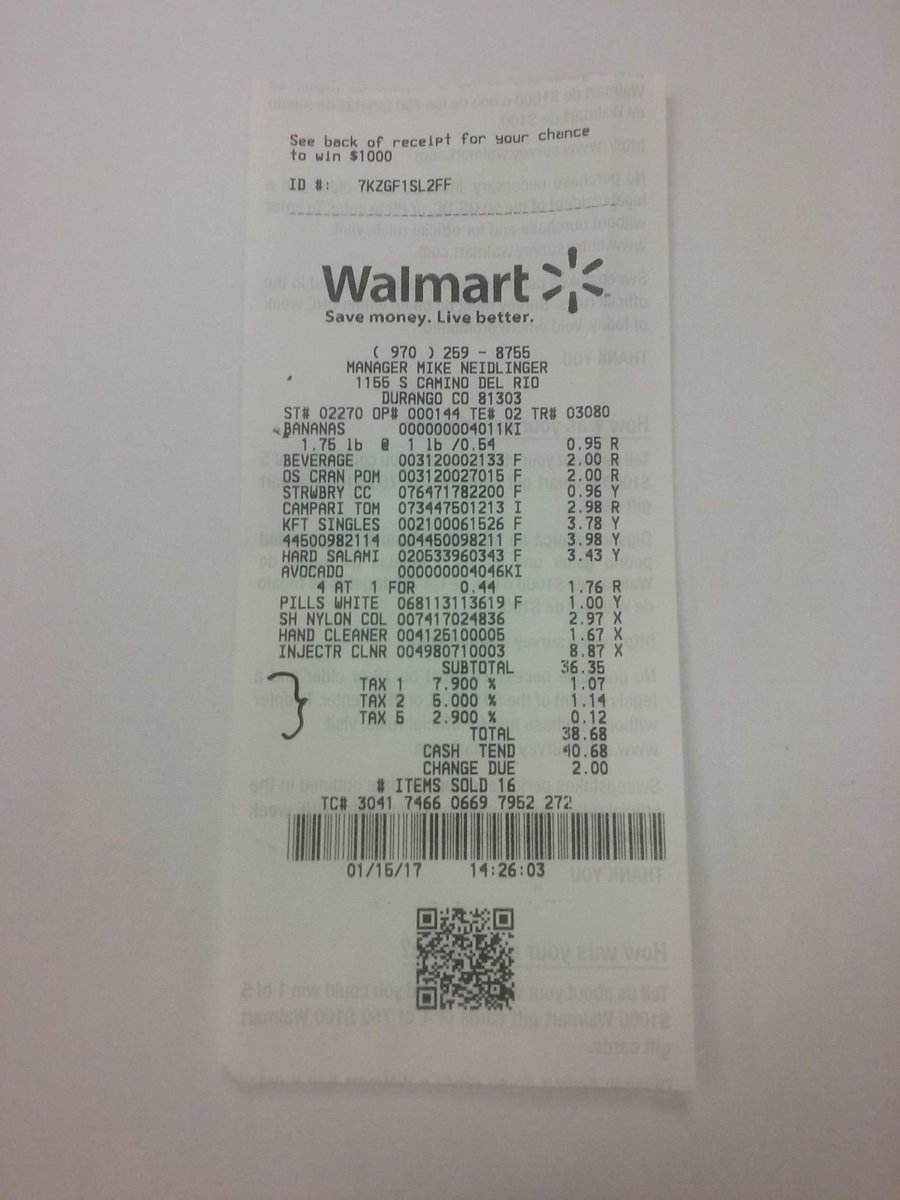

In [34]:
display(Image(filename="images_for_testing/receipts/17.jpg"))

In [35]:
Talk_with_llama_3_2_vision('Describe the content of the given image',

                           'images_for_testing/receipts/17.jpg')

The image shows a Walmart receipt, which is a document that summarizes the items purchased and their corresponding prices. The receipt also includes information about taxes, total cost, and other relevant details.

* **Header**
	+ Date: 01/15/17
	+ Store Name: Walmart
	+ Location: Durango, CO
* **Items Purchased**
	+ Bananas (1 lb): $0.95
	+ Beverage: $2.00
	+ Strawberry Cran Pomegranate Pombe: $2.00
	+ Campari Tomato: $2.98
	+ KFT Singles: $3.78
	+ Hard Salami: $3.43
	+ Avocado: $1.76
	+ Pills White: $1.00
	+ SH Nylon Colon: $2.97
	+ Hand Cleaner: $1.67
	+ Injectr Clnr: $8.87
* **Subtotal and Taxes**
	+ Subtotal: $36.35
	+ Tax (7%): $2.54
	+ Total: $38.89
* **Footer**
	+ Cash Paid: $40.68
	+ Change Due: $2.00

The total amount paid for the items purchased was $40.68, with a change due of $2.00. The receipt also shows that the customer received a discount on their purchase, as indicated by the "SUBTOTAL" line being lower than the "TAX (7%)" line.

Execution time: 97.99 seconds


### **Invoice and Handwritten Documents**

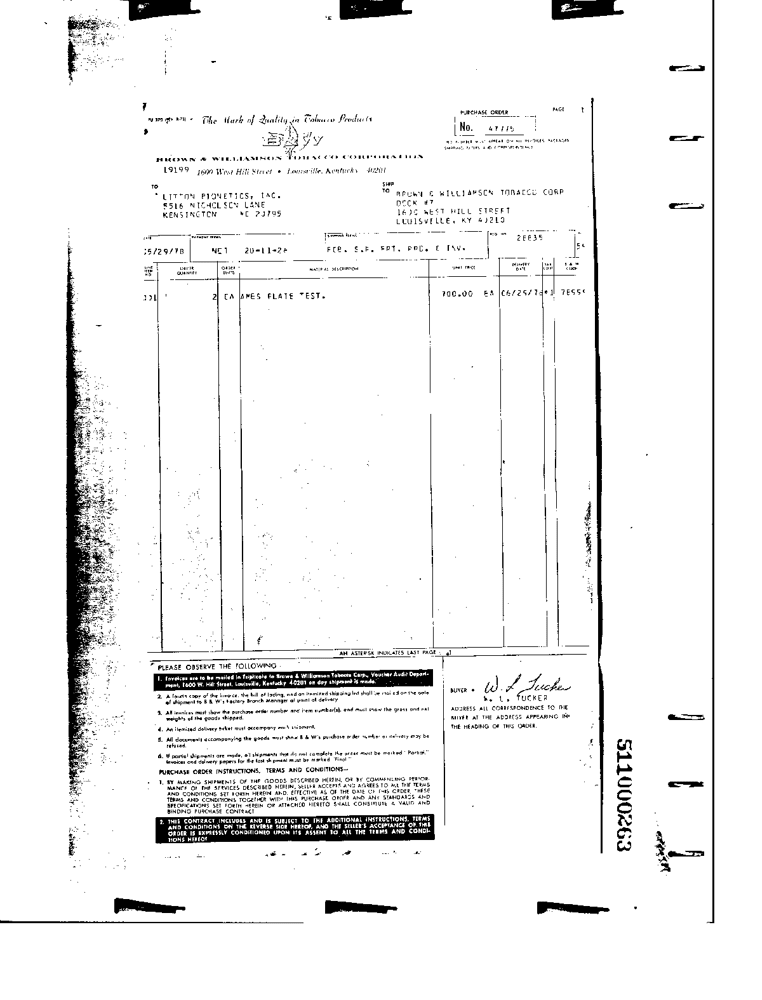

In [37]:
display(Image(filename="images_for_testing/invoice_and handwritten/0000089370.png"))

In [38]:
Talk_with_llama_3_2_vision('Describe the content of the given image',

                           'images_for_testing/invoice_and handwritten/0000089370.png')

The image depicts a purchase order document from Brown & Williamson Tobacco Corporation, dated 1970. The order is addressed to Letton Brothers and details two items: "2 EA AMES FLATE TEST" for $100.00 each, totaling $200.00. 

A handwritten note on the right side of the page reads "APPROVED BY W.G. TUCKER."

The document features a large black stamp across its center, which obscures some details; however, it is still possible to make out most of the information due to the stamp's placement.

Overall, the image provides insight into the purchasing habits and practices of Brown & Williamson Tobacco Corporation in 1970. The presence of the handwritten note suggests that the order was reviewed and approved by W.G. Tucker, indicating a level of scrutiny and attention to detail in the company's procurement process.

Execution time: 67.37 seconds


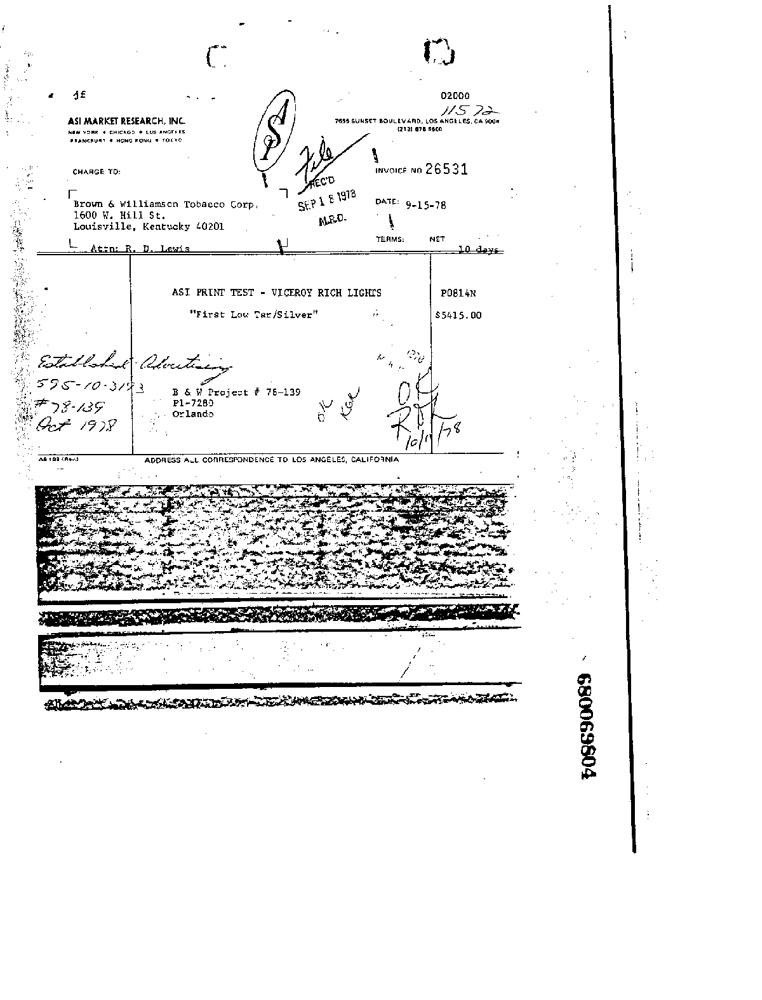

In [39]:
display(Image(filename="images_for_testing/invoice_and handwritten/0000102823.png"))

In [40]:
Talk_with_llama_3_2_vision('Describe the content of the given image',
                           'images_for_testing/invoice_and handwritten/0000102823.png')

This black-and-white document is an invoice from ASI Market Research, Inc. to Brown & Williamson Tobacco Corp., dated September 15th, 1978.

The top-left corner features the company's logo and name, "ASI MARKET RESEARCH, INC.", alongside their New York address. The top-right section displays a handwritten date in black ink and a typed Los Angeles address for the recipient.

Below this is an invoice number with the description: "Invoice No 26531". Further down, it reads "Brown & Williamson Tobacco Corp." on one line and "1600 W. Hill St., Louisville, Kentucky 40201" on the next. There are three illegible handwritten signatures below this information.

In the centre of the page, a table contains two columns: the left-hand column lists various charges to Brown & Williamson Tobacco Corporation, while the right-hand column provides their corresponding amounts in dollars and cents. The total amount due is $5,415.00.

Execution time: 63.58 seconds
